<a href="https://colab.research.google.com/github/Sachinsatya/data_insights-/blob/main/MNIST__II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
def check_images(random_num):
  plt.imshow(x_train[random_num])
  print(y_train[random_num])

5


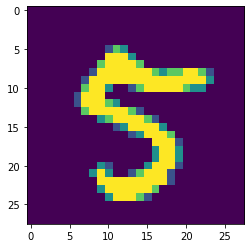

In [ ]:
check_images(512)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
# Deep Learning Project Lifecycle 
# 1. Understand the problem
# 2. Formulate the problem
# 3. Ask relevant questions (esp about data and process)
# 5. Define success, (KPIs or metrics)
# 6. Data is raw and dirty
# 7. Data cleaning, QC
# 8. Filtering data for training/validation/ testing 
# 9. Pre Processing, Feature Engg
# 10. Modelling 
# 11. Validation based Iterative Hyper parameter tunning
# 12. Test your model on test Data 
# 13. Inferencing/ Ship to produciton ..  
# 14. Look at the model errors, where does our model fails, so that we can create a fail-safe point! 
# 15. MLOps (Monitor, Data drifts)

In [ ]:
# Problem     - Recognise the Digit in images (Classification)
# Fornulate   - We will create a baseline DL model to recognise these digits 
# Success     -  
# Metrics     - Accuracy (Recall, Precision, F1 Score), Confusion Matrix

In [ ]:
# Pre-processing - 
# All images in dataset are 28x28 size 
# Scaling ...  
# Didive the x_train with 255.0

In [ ]:
x_train = x_train / 255.0

5


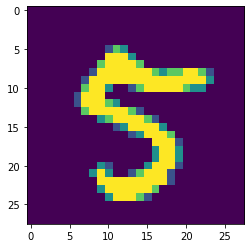

In [ ]:
check_images(512)

In [ ]:
x_train[512]

In [ ]:
 # Encoding - 
 # MNIST model has to yield 10 different outputs (0,1,2,3,4,5,6,7,8,9)
 # Cat Variable --> One Hot Encoded Value 

 # Output - [A,A,A,B,C]
 # A  | B | C
 # 1  | 0 | 0
 # 1  | 0 | 0
 # 1  | 0 | 0
 # 0  | 1 | 0
 # 0  | 0 | 1

In [ ]:
tf.keras.utils.to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
tf.keras.utils.to_categorical(y_train)[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
# Model

In [ ]:
# in Keras there are 2 types of modelling - 1. Sequential 2. Functional
# Sequential - 
# Creating a Model type
model = tf.keras.models.Sequential()

In [ ]:
# Add the first Input Layer and specify the input shape
model.add(tf.keras.layers.Input((28,28), name="Input")) 
# Add the Flatten layer to the model
model.add(tf.keras.layers.Flatten(name="Flat"))
# Hidden Layers (Dense Layers)
model.add(tf.keras.layers.Dense(100, activation=tf.keras.activations.relu, name="Hidden_Layer"))
# Output layer with 10 output ..
model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax, name='Output_Layer'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flat (Flatten)              (None, 784)               0         
                                                                 
 Hidden_Layer (Dense)        (None, 100)               78500     
                                                                 
 Output_Layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# weights = neurons in last year * neurons in current layer 
# bias = neurons in current layer
784 * 100 + 100

78500

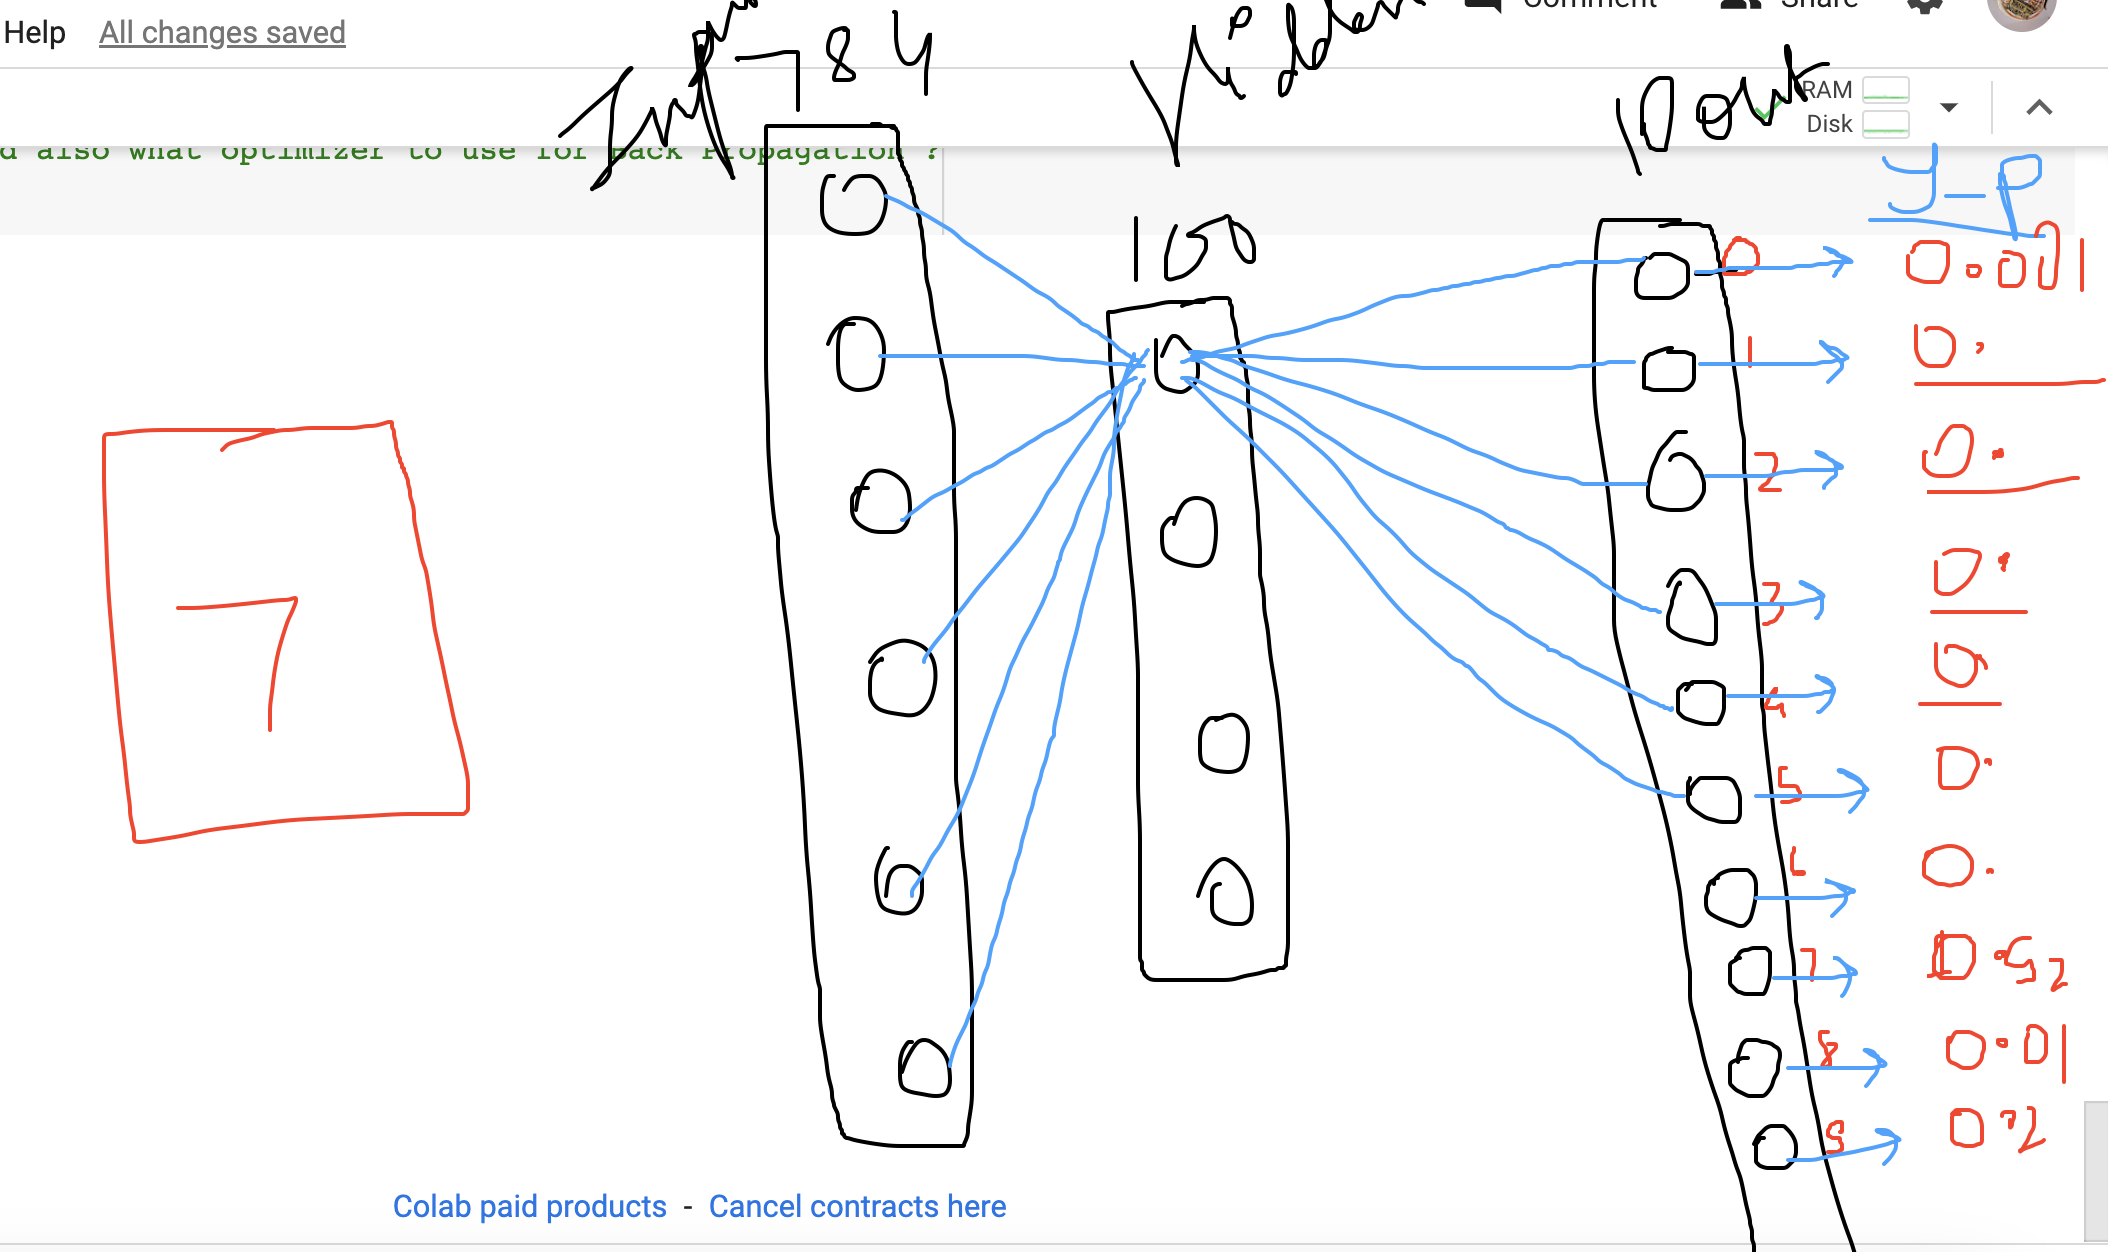

In [ ]:
# Define the Loss Function and also what optimizer to use for Back Propagation 
# ?tf.keras.optimizers.SGD
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), 
              metrics=["acc"])

In [ ]:
# Epochs - 1 cycle of all data has gone through FF, EC & BP
model.fit(x=x_train, y=y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3811 - acc: 0.8947 - val_loss: 0.3041 - val_acc: 0.9195
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3713 - acc: 0.8969 - val_loss: 0.2968 - val_acc: 0.9205
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3626 - acc: 0.8992 - val_loss: 0.2901 - val_acc: 0.9215
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3549 - acc: 0.9019 - val_loss: 0.2842 - val_acc: 0.9232
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3479 - acc: 0.9034 - val_loss: 0.2791 - val_acc: 0.9238
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.3415 - acc: 0.9051 - val_loss: 0.2741 - val_acc: 0.9252
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3357 - acc: 0.9065 - val_loss: 0.2698 - val_acc: 0.9248
Epoch 8/10
1688/1688 [==============================] - 5s 3ms

In [ ]:
# Model has got some ~91% accuracy

6


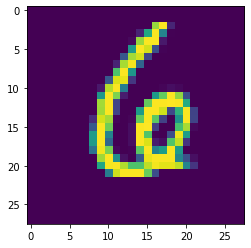

In [ ]:
plt.imshow(x_test[123])
print(y_test[123])

In [ ]:
model.input_shape # Num of images x H x W 

(None, 28, 28)

In [ ]:
def predict(num):
  plt.imshow(x_test[num])
  image = x_test[num]
  image = image / 255.0
  image = np.expand_dims(image, axis=0)
  result = model.predict(image)
  
  print(f"Model predicted: {np.argmax(result)} with confidence of {np.round(result.max() * 100, 2)}%")
  print(f"Correct Label : {y_test[num]}")  

1/1 [==============================] - 0s 47ms/step
Model predicted: 1 with confidence of 88.36%
Correct Label : 7


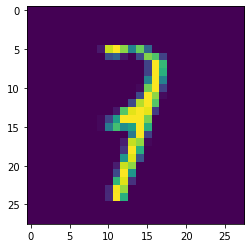

In [ ]:
predict(1500)

In [ ]:
# Format 

# Hidden Layers |   Neurons in HL   | Activation | Val Acc | Train Acc 